In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv("US_youtube_trending_data.csv")

In [3]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


## Cleaning up Unnecessary Columns



In [4]:
df = df.drop(['channelId','channelTitle','tags','thumbnail_link','ratings_disabled', 'description'], axis=1)

### Channels ID representing channels with high subscribers count may have their videos trended more, we decide to not consider the channel IDs since by using this as a dataset for our machine learning, we might unintentionally bias our video trend days to certain channel IDs who has larger subscriber base and thus videos predicted to trend longer and likewise channels that may have made trending videos but not being predicted to trend lower due to its subscriber count.

In [5]:
df.head()

,video_id,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,False
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,False
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,False
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,False
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,False


In [6]:
df = df[df.comments_disabled == False]

## Checking through the files to see when are the videos published

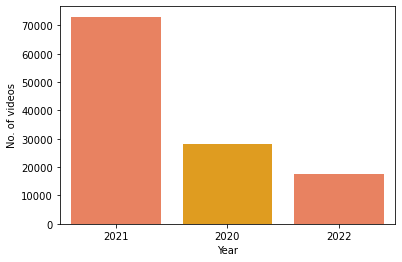

In [7]:
cdf = df["publishedAt"].apply(lambda x: '' + x[:4]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "publishedAt": "No_of_videos"})

fig, ax = plt.subplots()
_ = sb.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sb.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

### By looking through the data, we have found out that there are videos that are trending for multiple days, they are shown by the repeated entries with the same "video_ID".

### We created a new column "Number_of_days_it trended", where we count the number of times the same publishing date has appeared, which we later removed the video_ID column as it is not useful for the analysis.

In [8]:
df['Number_of_days_it_trended'] = df.groupby(['video_id'])['view_count'].transform('count')
df.head(n=10)

,video_id,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,Number_of_days_it_trended
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,22,2020-08-12T00:00:00Z,1514614,156908,5855,35313,False,7
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,2381688,146739,2794,16549,False,5
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,2038853,353787,2628,40221,False,7
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,10,2020-08-12T00:00:00Z,496771,23251,1856,7647,False,5
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,26,2020-08-12T00:00:00Z,1123889,45802,964,2196,False,6
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,24,2020-08-12T00:00:00Z,949491,77487,746,7506,False,6
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,26,2020-08-12T00:00:00Z,470446,47990,440,4558,False,6
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,27,2020-08-12T00:00:00Z,1050143,89190,854,6455,False,6
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,24,2020-08-12T00:00:00Z,1402687,95694,2158,6613,False,6
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,10,2020-08-12T00:00:00Z,741028,113983,4373,5618,False,6


### Removed the duplicates entries to show the individual videos that have been trending

In [9]:
df = df.drop_duplicates(subset=['video_id'],keep="last")
df = df.drop(['video_id'], axis=1)
df.head(n =10)

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,Number_of_days_it_trended
172,How To Make a Curried Egg Sandwich,2020-08-07T18:30:06Z,26,2020-08-12T00:00:00Z,1238677,104736,3736,13876,False,1
173,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07T09:30:04Z,24,2020-08-12T00:00:00Z,938198,44088,565,2409,False,1
174,"Son, lemme teach you something new",2020-08-06T19:47:12Z,24,2020-08-12T00:00:00Z,1722152,169501,927,7263,False,1
175,Trump takes executive action to address econom...,2020-08-09T01:35:42Z,25,2020-08-12T00:00:00Z,1090847,10922,2517,9876,False,1
176,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06T23:01:42Z,24,2020-08-12T00:00:00Z,971704,23311,1987,3240,False,1
177,Juventus vs. Lyon | CHAMPIONS LEAGUE Round of ...,2020-08-07T21:25:58Z,17,2020-08-12T00:00:00Z,764778,6771,292,2450,False,1
178,Yashahime: Princess Half-Demon | Official Anno...,2020-08-07T03:00:02Z,1,2020-08-12T00:00:00Z,740830,34199,280,3413,False,1
179,Russ - Why (Official Video),2020-08-07T05:24:50Z,10,2020-08-12T00:00:00Z,761871,52139,910,2879,False,1
180,Explained: What happened in deadly Beirut expl...,2020-08-05T21:01:33Z,25,2020-08-12T00:00:00Z,8496552,74508,3034,11855,False,1
181,Forgive Me - Live - Chloe x Halle,2020-08-07T01:45:25Z,24,2020-08-12T00:00:00Z,776252,91286,674,4811,False,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21516 entries, 172 to 120590
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      21516 non-null  object
 1   publishedAt                21516 non-null  object
 2   categoryId                 21516 non-null  int64 
 3   trending_date              21516 non-null  object
 4   view_count                 21516 non-null  int64 
 5   likes                      21516 non-null  int64 
 6   dislikes                   21516 non-null  int64 
 7   comment_count              21516 non-null  int64 
 8   comments_disabled          21516 non-null  bool  
 9   Number_of_days_it_trended  21516 non-null  int64 
dtypes: bool(1), int64(6), object(3)
memory usage: 1.7+ MB


### There were some videos that has 0 views in this dataset, we removed it as these entries would affect the outcome of the prediction of trending videos.

In [11]:
df = df[df.view_count != 0]

In [12]:
df.head(n=10)

,title,publishedAt,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,Number_of_days_it_trended
172,How To Make a Curried Egg Sandwich,2020-08-07T18:30:06Z,26,2020-08-12T00:00:00Z,1238677,104736,3736,13876,False,1
173,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07T09:30:04Z,24,2020-08-12T00:00:00Z,938198,44088,565,2409,False,1
174,"Son, lemme teach you something new",2020-08-06T19:47:12Z,24,2020-08-12T00:00:00Z,1722152,169501,927,7263,False,1
175,Trump takes executive action to address econom...,2020-08-09T01:35:42Z,25,2020-08-12T00:00:00Z,1090847,10922,2517,9876,False,1
176,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06T23:01:42Z,24,2020-08-12T00:00:00Z,971704,23311,1987,3240,False,1
177,Juventus vs. Lyon | CHAMPIONS LEAGUE Round of ...,2020-08-07T21:25:58Z,17,2020-08-12T00:00:00Z,764778,6771,292,2450,False,1
178,Yashahime: Princess Half-Demon | Official Anno...,2020-08-07T03:00:02Z,1,2020-08-12T00:00:00Z,740830,34199,280,3413,False,1
179,Russ - Why (Official Video),2020-08-07T05:24:50Z,10,2020-08-12T00:00:00Z,761871,52139,910,2879,False,1
180,Explained: What happened in deadly Beirut expl...,2020-08-05T21:01:33Z,25,2020-08-12T00:00:00Z,8496552,74508,3034,11855,False,1
181,Forgive Me - Live - Chloe x Halle,2020-08-07T01:45:25Z,24,2020-08-12T00:00:00Z,776252,91286,674,4811,False,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21513 entries, 172 to 120590
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      21513 non-null  object
 1   publishedAt                21513 non-null  object
 2   categoryId                 21513 non-null  int64 
 3   trending_date              21513 non-null  object
 4   view_count                 21513 non-null  int64 
 5   likes                      21513 non-null  int64 
 6   dislikes                   21513 non-null  int64 
 7   comment_count              21513 non-null  int64 
 8   comments_disabled          21513 non-null  bool  
 9   Number_of_days_it_trended  21513 non-null  int64 
dtypes: bool(1), int64(6), object(3)
memory usage: 1.7+ MB


## Converted the file after cleaning

In [14]:
df.to_csv("same_publishing_timing.csv", index = False)

### Through data cleaning, we are able to see the bigger picture on what are the factors that we are able to use to determine whether the video is trending or not.